In [62]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)         # To display all the data in each column
pd.set_option('display.max_columns', None)          # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

In [63]:
drug=pd.read_csv('drug_train.csv')

In [64]:
drug.head()

,Id,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,79,32,F,LOW,NORMAL,10.840,drugX
1,197,52,M,NORMAL,HIGH,9.894,drugX
2,38,39,F,NORMAL,NORMAL,9.709,drugX
3,24,33,F,LOW,HIGH,33.486,DrugY
4,122,34,M,NORMAL,HIGH,22.456,DrugY


In [65]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           160 non-null    int64  
 1   Age          160 non-null    int64  
 2   Sex          160 non-null    object 
 3   BP           160 non-null    object 
 4   Cholesterol  160 non-null    object 
 5   Na_to_K      160 non-null    float64
 6   Drug         160 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.9+ KB


In [66]:
drug.describe(include='all')

,Id,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,160.000000,160.000000,160,160,160,160.000000,160
unique,NaN,NaN,2,3,2,NaN,5
top,NaN,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,NaN,83,62,88,NaN,76
mean,99.075000,45.387500,NaN,NaN,NaN,16.194988,NaN
std,59.374894,16.101481,NaN,NaN,NaN,7.254689,NaN
min,0.000000,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,45.500000,32.000000,NaN,NaN,NaN,10.445250,NaN
50%,100.500000,46.000000,NaN,NaN,NaN,14.076500,NaN
75%,149.500000,58.250000,NaN,NaN,NaN,19.480750,NaN


<AxesSubplot:>

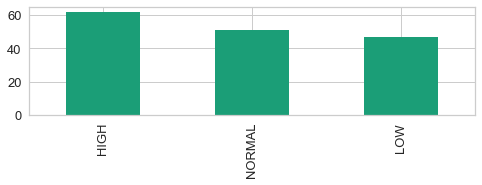

In [67]:
drug['BP'].value_counts().plot.bar(figsize=(8,2), colormap='Dark2', fontsize=13)

<AxesSubplot:>

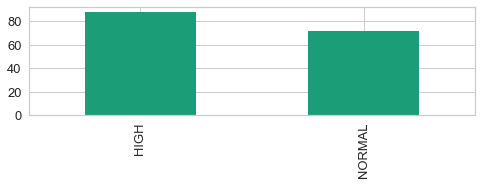

In [68]:
drug['Cholesterol'].value_counts().plot.bar(figsize=(8,2), colormap='Dark2', fontsize=13)

<AxesSubplot:>

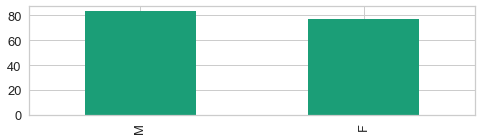

In [69]:
drug['Sex'].value_counts().plot.bar(figsize=(8,2), colormap='Dark2', fontsize=13)

Text(0.5, 1.0, 'Age Group vs Treatment')

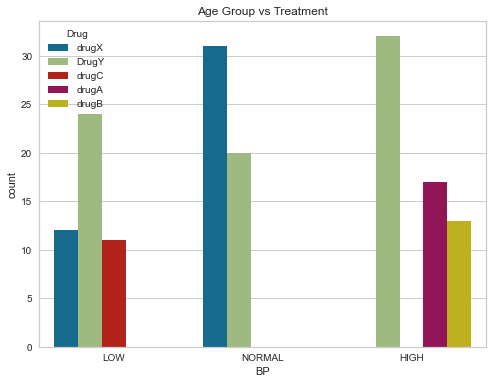

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import pie, axis, show
%matplotlib inline    
fig,ax =plt.subplots(figsize=(8,6))
sns.countplot(data = drug,x = 'BP', hue='Drug')
plt.title('Age Group vs Treatment')

Text(0.5, 1.0, 'Age Group vs Treatment')

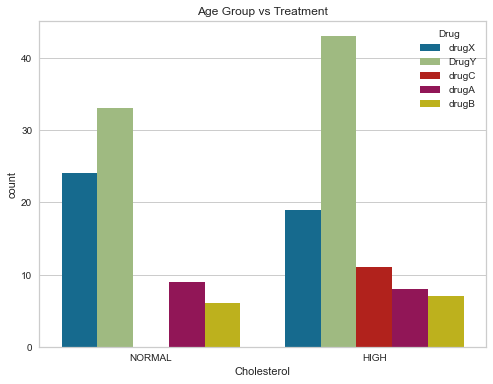

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import pie, axis, show
%matplotlib inline    
fig,ax =plt.subplots(figsize=(8,6))
sns.countplot(data = drug,x = 'Cholesterol', hue='Drug')
plt.title('Age Group vs Treatment')

In [74]:
def encoding(drug):
    cat_columns=['BP','Sex','Cholesterol']
    cat_dum=pd.get_dummies(drug[cat_columns],drop_first=True)
    drug=pd.concat([drug,cat_dum],axis=1)
    return drug
drug=encoding(drug)

In [75]:
drug.head()

,Id,Age,Sex,BP,Cholesterol,Na_to_K,Drug,BP_LOW,BP_NORMAL,Sex_M,Cholesterol_NORMAL
0,79,32,F,LOW,NORMAL,10.840,drugX,1,0,0,1
1,197,52,M,NORMAL,HIGH,9.894,drugX,0,1,1,0
2,38,39,F,NORMAL,NORMAL,9.709,drugX,0,1,0,1
3,24,33,F,LOW,HIGH,33.486,DrugY,1,0,0,0
4,122,34,M,NORMAL,HIGH,22.456,DrugY,0,1,1,0


In [76]:
drug.drop(['BP','Cholesterol','Sex'],axis=1,inplace=True)

In [77]:
drug.head()

,Id,Age,Na_to_K,Drug,BP_LOW,BP_NORMAL,Sex_M,Cholesterol_NORMAL
0,79,32,10.840,drugX,1,0,0,1
1,197,52,9.894,drugX,0,1,1,0
2,38,39,9.709,drugX,0,1,0,1
3,24,33,33.486,DrugY,1,0,0,0
4,122,34,22.456,DrugY,0,1,1,0


In [78]:
drug_new=drug
drug_new.drop('Id',axis=1,inplace=True)

In [79]:
X=drug_new.drop('Drug', axis = 1)
y=drug_new.Drug

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [81]:
from sklearn.preprocessing import RobustScaler
robust = RobustScaler()
X_train = robust.fit_transform(X_train)
X_test = robust.transform(X_test)

In [85]:
from sklearn.naive_bayes import GaussianNB  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=10)
pipeNB = Pipeline((
("sc",RobustScaler()),    
("Naive",GaussianNB()) ,    
))
pipeNB.fit(X_train,y_train)
print("Testing Accuracy")
print(pipeNB.score(X_test,y_test))
print("Training Accuracy")
print(pipeNB.score(X_train,y_train))
from sklearn.model_selection import cross_val_score
scoresknn = cross_val_score(pipeNB, X_train, y_train, cv=10,scoring='accuracy')
print()
print("Average Accuracy")
print(np.mean(scoresknn))

Testing Accuracy
0.8125
Training Accuracy
0.7734375

Average Accuracy
0.7705128205128206


In [86]:
#Naive aise with out scaling
from sklearn.naive_bayes import GaussianNB  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=10)
pipeNBS = Pipeline((    
("Naive",GaussianNB()) ,    
))
pipeNBS.fit(X_train,y_train)
print("Testing Accuracy")
print(pipeNBS.score(X_test,y_test))
print("Training Accuracy")
print(pipeNBS.score(X_train,y_train))
from sklearn.model_selection import cross_val_score
scoresknn = cross_val_score(pipeNBS, X_train, y_train, cv=10,scoring='accuracy')
print()
print("Average Accuracy")
print(np.mean(scoresknn))

Testing Accuracy
0.8125
Training Accuracy
0.7890625

Average Accuracy
0.7865384615384615


In [87]:
from sklearn.naive_bayes import GaussianNB  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=10)
pipeDT = Pipeline(( 
("DT",DecisionTreeClassifier(random_state = 42, max_depth = 5)) ,    
))
pipeDT.fit(X_train,y_train)
print("Testing Accuracy")
print(pipeDT.score(X_test,y_test))
print("Training Accuracy")
print(pipeDT.score(X_train,y_train))
from sklearn.model_selection import cross_val_score
scoresknn = cross_val_score(pipeDT, X_train, y_train, cv=10,scoring='accuracy')
print()
print("Average Accuracy")
print(np.mean(scoresknn))

Testing Accuracy
1.0
Training Accuracy
1.0

Average Accuracy
0.9839743589743589


In [88]:
#random forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=10)
pipeRF = Pipeline(( 
("RF",RandomForestClassifier(random_state = 42, max_depth = 5)) ,    
))
pipeRF.fit(X_train,y_train)
print("Testing Accuracy")
print(pipeRF.score(X_test,y_test))
print("Training Accuracy")
print(pipeRF.score(X_train,y_train))
from sklearn.model_selection import cross_val_score
scoresknn = cross_val_score(pipeRF, X_train, y_train, cv=10,scoring='accuracy')
print()
print("Average Accuracy")
print(np.mean(scoresknn))

Testing Accuracy
1.0
Training Accuracy
1.0

Average Accuracy
0.9839743589743589


In [89]:
from sklearn.naive_bayes import GaussianNB  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=10)
pipe = Pipeline(( 
("DT",DecisionTreeClassifier(random_state = 42, max_depth = 5)) ,    
))
pipe.fit(X_train,y_train)
print("Testing Accuracy")
print(pipe.score(X_test,y_test))
print("Training Accuracy")
print(pipe.score(X_train,y_train))
from sklearn.model_selection import cross_val_score
scoresknn = cross_val_score(pipe, X_train, y_train, cv=10,scoring='accuracy')
print()
print("Average Accuracy")
print(np.mean(scoresknn))

Testing Accuracy
1.0
Training Accuracy
1.0

Average Accuracy
0.9839743589743589


In [90]:
!pip install -q yellowbrick 

In [51]:
from yellowbrick.classifier import PrecisionRecallCurve
def PRCurve(model):
  '''
  A function to compute Precision Recall Curve
  Data to fit must be training i.e. X_train, y_train
  Data score will be estimated on X_test, y_test
  '''
  viz = PrecisionRecallCurve(model)
  viz.fit(X_train, y_train)
  avg_prec = viz.score(X_test, y_test)
  plt.legend(labels = ['Binary PR Curve',"AP=%.3f"%avg_prec], loc = 'lower right', prop={'size': 14})
  plt.xlabel(xlabel = 'Recall', size = 14)
  plt.ylabel(ylabel = 'Precision', size = 14)
  plt.title(label = 'Precision Recall Curve', size = 16)

In [99]:
#With Pipeline
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import PowerTransformer,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=10)
pipe = Pipeline((
("sc",RobustScaler()),    
("knn",KNeighborsClassifier(n_neighbors=10)) ,    
))
pipe.fit(X_train,y_train)
print("Testing Accuracy")
print(pipe.score(X_test,y_test))
print("Training Accuracy")
print(pipe.score(X_train,y_train))
from sklearn.model_selection import cross_val_score
scoresknn = cross_val_score(pipe, X_train, y_train, cv=10,scoring='accuracy')
print()
print("Average Accuracy")
print(np.mean(scoresknn))

Testing Accuracy
0.9375
Training Accuracy
0.9296875

Average Accuracy
0.8583333333333334


In [100]:
drug_test=pd.read_csv('drug_test.csv')

In [101]:
def encoding(drug_test):
    cat_columns=['BP','Sex','Cholesterol']
    cat_dum=pd.get_dummies(drug_test[cat_columns],drop_first=True)
    drug_test=pd.concat([drug_test,cat_dum],axis=1)
    return drug_test
drug_test=encoding(drug_test)

In [102]:
drug_test.drop(['BP','Cholesterol','Sex'],axis=1,inplace=True)

In [103]:
drug_new1=drug_test
drug_new1.drop('Id',axis=1,inplace=True)

In [105]:
y_pred=pipe.predict(drug_new1)

In [109]:
drug_test1=pd.read_csv('drug_test.csv')

In [110]:
df3 = pd.DataFrame({"Id":drug_test1.Id,"Drug":y_pred})

In [111]:
df3.Drug.value_counts()

DrugY    18
drugX     8
drugA     6
drugC     5
drugB     3
Name: Drug, dtype: int64

In [112]:
df3.to_csv('Drug_prediction_output.csv',index=False, header=False)